In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv('Rain Prediction Train.csv')
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No


1.	Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill. Also find the sunny places to setup a solar field. Take values more than 75 percentile as minimum values for analysis.

In [17]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,99564.000000,99784.000000,99030.000000,57367.000000,52518.000000,93460.000000,99062.000000,98146.000000,98762.000000,97456.000000,90163.000000,90188.000000,62372.000000,59989.000000,99380.000000,98090.000000
mean,12.190559,23.228404,2.346882,5.467535,7.627004,39.986818,14.008045,18.623846,68.845599,51.491155,1017.631809,1015.242128,4.432261,4.502492,16.986879,21.685637
std,6.412850,7.117851,8.357515,4.186620,3.783709,13.589459,8.898406,8.797918,19.064754,20.824180,7.105450,7.032167,2.887452,2.721770,6.500404,6.940969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,47.300000,278.400000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.700000


In [18]:
data.shape

(100000, 23)

In [19]:
data.isnull().sum()/len(data)*100

Date              0.000
Location          0.000
MinTemp           0.436
MaxTemp           0.216
Rainfall          0.970
Evaporation      42.633
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     6.540
WindDir9am        7.062
WindDir3pm        2.691
WindSpeed9am      0.938
WindSpeed3pm      1.854
Humidity9am       1.238
Humidity3pm       2.544
Pressure9am       9.837
Pressure3pm       9.812
Cloud9am         37.628
Cloud3pm         40.011
Temp9am           0.620
Temp3pm           1.910
RainToday         0.970
RainTomorrow      0.000
dtype: float64

In [20]:
data['Location'].describe()

count       100000
unique          49
top       Canberra
freq          2414
Name: Location, dtype: object

In [21]:
# data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].median()) --here there is high deviation when replacing with 
# median
data['Sunshine'].dropna()

1         0.4
2        10.9
4        10.2
6         6.6
7        12.5
8         3.4
10        8.1
14       12.5
16       11.5
18        2.5
19        8.7
20        4.2
21       10.9
23        6.2
25        9.4
29        1.4
33       13.7
35        5.9
38       10.3
40        6.4
41        1.4
42        9.5
43        7.4
44       11.2
45        3.0
48        3.7
49       11.9
52        5.1
56        8.4
59        4.1
         ... 
99951     7.3
99952    10.4
99953     1.9
99955    13.3
99956    12.4
99959     0.8
99961    12.1
99962     7.0
99964     7.5
99965     4.5
99966     4.9
99968     6.2
99969     2.4
99970     3.9
99971    12.5
99973     6.3
99978     9.1
99981    10.9
99982    10.7
99986     8.7
99987     9.0
99989     8.5
99991    11.2
99992    12.0
99993     0.7
99995    12.9
99996     3.8
99997     5.2
99998     2.1
99999     1.2
Name: Sunshine, Length: 52518, dtype: float64

In [22]:
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data.isnull().sum()/len(data)*100

Date              0.000
Location          0.000
MinTemp           0.436
MaxTemp           0.216
Rainfall          0.970
Evaporation       0.000
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     6.540
WindDir9am        7.062
WindDir3pm        2.691
WindSpeed9am      0.938
WindSpeed3pm      1.854
Humidity9am       1.238
Humidity3pm       2.544
Pressure9am       9.837
Pressure3pm       9.812
Cloud9am         37.628
Cloud3pm         40.011
Temp9am           0.620
Temp3pm           1.910
RainToday         0.970
RainTomorrow      0.000
dtype: float64

In [23]:
data['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())

In [24]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data.isnull().sum()/len(data)*100

Date              0.000
Location          0.000
MinTemp           0.436
MaxTemp           0.216
Rainfall          0.970
Evaporation       0.000
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     0.000
WindDir9am        7.062
WindDir3pm        2.691
WindSpeed9am      0.938
WindSpeed3pm      1.854
Humidity9am       0.000
Humidity3pm       0.000
Pressure9am       0.000
Pressure3pm       0.000
Cloud9am          0.000
Cloud3pm          0.000
Temp9am           0.620
Temp3pm           1.910
RainToday         0.970
RainTomorrow      0.000
dtype: float64

In [25]:
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode())
data.isnull().sum()/len(data)*100

Date              0.000
Location          0.000
MinTemp           0.436
MaxTemp           0.216
Rainfall          0.970
Evaporation       0.000
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     0.000
WindDir9am        7.062
WindDir3pm        2.691
WindSpeed9am      0.938
WindSpeed3pm      1.854
Humidity9am       0.000
Humidity3pm       0.000
Pressure9am       0.000
Pressure3pm       0.000
Cloud9am          0.000
Cloud3pm          0.000
Temp9am           0.620
Temp3pm           1.910
RainToday         0.970
RainTomorrow      0.000
dtype: float64

In [26]:
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())
data.isnull().sum()/len(data)*100

Date              0.000
Location          0.000
MinTemp           0.436
MaxTemp           0.216
Rainfall          0.970
Evaporation       0.000
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     0.000
WindDir9am        7.062
WindDir3pm        2.691
WindSpeed9am      0.938
WindSpeed3pm      1.854
Humidity9am       0.000
Humidity3pm       0.000
Pressure9am       0.000
Pressure3pm       0.000
Cloud9am          0.000
Cloud3pm          0.000
Temp9am           0.000
Temp3pm           0.000
RainToday         0.970
RainTomorrow      0.000
dtype: float64

In [27]:
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())

In [28]:
data.isnull().sum()/len(data)*100

Date             0.000
Location         0.000
MinTemp          0.436
MaxTemp          0.216
Rainfall         0.970
Evaporation      0.000
Sunshine         0.000
WindGustDir      6.581
WindGustSpeed    0.000
WindDir9am       7.062
WindDir3pm       2.691
WindSpeed9am     0.938
WindSpeed3pm     1.854
Humidity9am      0.000
Humidity3pm      0.000
Pressure9am      0.000
Pressure3pm      0.000
Cloud9am         0.000
Cloud3pm         0.000
Temp9am          0.000
Temp3pm          0.000
RainToday        0.970
RainTomorrow     0.000
dtype: float64

In [29]:
data.shape

(100000, 23)

# 1. Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill. Also find the sunny places to setup a solar field. Take values more than 75 percentile as minimum values for analysis

In [30]:
data['Wind Average Speed']=(data['WindSpeed9am']+data['WindSpeed3pm'])/2
q75=data['Wind Average Speed'].quantile(0.75)
q75

20.5

In [31]:
data_windy=data[data['Wind Average Speed']>q75]
data_windy.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Wind Average Speed
3,21-11-2012,Wollongong,13.8,22.8,0.0,5.467535,7.627004,SSW,70.0,N,...,76.0,1017.0,1010.6,4.432261,4.502492,18.9,20.6,No,No,28.0
10,31-03-2012,Dartmoor,11.1,21.8,0.0,7.000000,8.100000,WNW,39.0,W,...,51.0,1012.7,1014.5,4.432261,4.502492,16.9,19.7,No,No,23.0
12,26-02-2012,Ballarat,20.6,32.3,0.0,5.467535,7.627004,N,65.0,NNE,...,47.0,1012.5,1009.4,1.000000,6.000000,23.7,28.7,No,Yes,38.0
16,04-11-2014,Mildura,12.5,33.9,0.0,7.600000,11.500000,SW,48.0,N,...,6.0,1016.7,1013.0,1.000000,7.000000,23.6,31.9,No,No,24.0
20,26-04-2009,MelbourneAirport,7.2,13.1,1.8,5.200000,4.200000,W,81.0,NNW,...,69.0,997.8,999.0,7.000000,7.000000,9.5,11.2,Yes,Yes,39.0


In [32]:
windy_places=data_windy['Location'].value_counts().reset_index()
windy_places.columns=['Location-Windy','Frequency']
windy_places.head(10)

,Location-Windy,Frequency
0,Ballarat,1081
1,GoldCoast,1076
2,SydneyAirport,1040
3,NorfolkIsland,1005
4,MelbourneAirport,987
5,MountGambier,904
6,Townsville,889
7,Woomera,884
8,PerthAirport,868
9,Cairns,769


In [33]:
sq75=data['Sunshine'].quantile(0.75)
print(sq75)
data_sunny=data[data['Sunshine']>sq75]
sunny_places=data_sunny['Location'].value_counts().reset_index()
sunny_places.columns=['Location-Sunny','Frequency']
sunny_places.head(10)

8.8


,Location-Sunny,Frequency
0,Darwin,1383
1,AliceSprings,1368
2,Perth,1359
3,Brisbane,1248
4,PerthAirport,1234
5,Townsville,1175
6,PearceRAAF,1161
7,Mildura,1084
8,Sydney,1032
9,Moree,990


# 2. Find the locations where humidity and temperature are more than 80 percentile value.

In [34]:
data['Average Humidity']=(data['Humidity9am']+data['Humidity3pm'])/2
hq80=data['Average Humidity'].quantile(0.80)
data['Average Temperature']=(data['MinTemp']+data['MaxTemp'])/2
tq80=data['Average Temperature'].quantile(0.80)
location_ht=data[data['Average Humidity']>hq80]
# location_ht.head(5)

In [35]:
location_ht=data[data['Average Temperature']>tq80]

In [36]:
loc_hum_temp = location_ht['Location'].value_counts().reset_index()
loc_hum_temp.columns=['Location','Count']
loc_hum_temp.head()

,Location,Count
0,Darwin,2141
1,Cairns,1618
2,Townsville,1471
3,AliceSprings,925
4,Katherine,880


# 3.Find 3 places where rainfall, sunshine, humidity is not too high or too low[ Use logical threshold using percentile values]

In [37]:
rq90=data['Rainfall'].quantile(0.90) # the value of 25 percentile is zero, therefore,taking neither too low nor too high
# checking for different values of percentile
rq97=data['Rainfall'].quantile(0.97)
print(rq90)
print(rq97)

6.0
19.4


In [38]:
sq20=data['Sunshine'].quantile(0.20)
sq75=data['Sunshine'].quantile(0.75)
print(sq20)
print(sq75)

7.0
8.8


In [39]:
ahq25=data['Average Humidity'].quantile(0.15)
ahq75=data['Average Humidity'].quantile(0.70)
print(ahq25)
print(ahq75)

41.0
70.0


In [40]:
top3=data[data['Rainfall'].between(rq90,rq97)]
# top3.head(50)

In [41]:
top3=top3[top3['Sunshine'].between(sq20,sq75)]
# top3.head(20)

In [42]:
top3=top3[top3['Average Humidity'].between(ahq25,ahq75)]
top3['Location'].head(3)

17     WaggaWagga
84      Katherine
240      Watsonia
Name: Location, dtype: object

# 4.Find the top 3 places where rainfall is high, but cloud cover is low and vice versa. Take cloud cover avg>5.

In [43]:
q99=data['Rainfall'].quantile(0.99)
q65=data['Rainfall'].quantile(0.65)
print(q99)
print(q65)


37.8
0.2


In [44]:
data['Average Cloud']=(data['Cloud9am']+data['Cloud3pm'])/2
highrain_lowcloud=data[data['Rainfall']>q99]
highrain_lowcloud=highrain_lowcloud[highrain_lowcloud['Average Cloud']<5]
highrain_lowcloud.sort_values(by='Rainfall',ascending=False,inplace=True)
print("Top 3 places where the rainfall is high and the average cloud cover is less than 5")
highrain_lowcloud['Location'].head(3)


Top 3 places where the rainfall is high and the average cloud cover is less than 5


31622    CoffsHarbour
22481    CoffsHarbour
94346       GoldCoast
Name: Location, dtype: object

In [45]:
lowrain_highcloud=data[data['Rainfall']<q65]
lowrain_highcloud=lowrain_highcloud[lowrain_highcloud['Average Cloud']>5]
lowrain_highcloud.sort_values(by='Rainfall',inplace=True)
print("Top 3 places where the rainfall is low and the average cloud cover is greater than 5")
lowrain_highcloud['Location'].head(3)

Top 3 places where the rainfall is low and the average cloud cover is greater than 5


1         Portland
66324    Melbourne
66328      Bendigo
Name: Location, dtype: object

# 5. Which wind direction causes rain in which cities?

In [47]:
winddir=data[data['RainToday']=='Yes']
winddir=winddir.groupby(['Location','WindGustDir'])['Rainfall'].sum().reset_index()
winddir.columns=['Location','WindGustDir','Sum of Rainfall']
winddir.sort_values(by='Sum of Rainfall',ascending=False,inplace=True)
winddir
winddir.drop_duplicates(subset='Location',keep='first')

,Location,WindGustDir,Sum of Rainfall
119,Cairns,SE,3226.4
585,Townsville,ESE,2252.4
203,Darwin,WNW,2003.0
384,NorahHead,S,1904.0
215,GoldCoast,SSE,1763.2
719,Wollongong,S,1347.0
95,Brisbane,E,1325.2
575,SydneyAirport,S,1323.0
687,Williamtown,S,1220.5
259,Launceston,NNW,1144.9


# 6. Top 5 coastal places where evaporation is higher than mean for setting up salt preparation plants

In [48]:
mean_evaporation=data['Evaporation'].mean()
coastal_places=data[data['Evaporation']>mean_evaporation]
top5_coastal=coastal_places.groupby('Location')['Evaporation'].sum().reset_index()
top5_coastal.columns=['Location','Total Evaporation']
top5_coastal.sort_values(by='Total Evaporation',ascending=False).head()

,Location,Total Evaporation
48,Woomera,17684.625532
3,AliceSprings,16761.403049
39,Townsville,13170.622262
21,Moree,12279.670056
40,Tuggeranong,11536.499573


# 7. Suggest a strategy for a winter goods company to choose the location and months to promote their products.m

In [49]:
print(data['MinTemp'].min())
print(data['MaxTemp'].min())

-8.5
-4.8


In [50]:
data['Date']=pd.to_datetime(data['Date'])

In [51]:
mean_mintemp=data['MinTemp'].mean()
cold_loc=data[data['MinTemp']<mean_mintemp]

In [52]:
data['Month']=data['Date'].dt.month_name()
cold_loc['Month']=data['Month']

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Wind Average Speed,Average Humidity,Average Temperature,Average Cloud,Month
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.600000,7.627004,NNE,31.0,SW,...,4.000000,21.5,24.2,Yes,No,13.0,71.0,21.80,5.500000,July
1,2009-04-23,Portland,6.7,22.0,0.0,5.400000,0.400000,NNE,44.0,NE,...,8.000000,14.0,21.8,No,Yes,16.0,51.0,14.35,7.500000,April
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.200000,10.900000,WSW,20.0,SE,...,7.000000,12.8,23.6,No,No,6.5,49.5,15.95,4.500000,August
3,2012-11-21,Wollongong,13.8,22.8,0.0,5.467535,7.627004,SSW,70.0,N,...,4.502492,18.9,20.6,No,No,28.0,70.5,18.30,4.467377,November
4,2013-07-30,Townsville,13.4,27.2,0.0,6.000000,10.200000,ENE,30.0,SSW,...,1.000000,21.7,25.6,No,No,11.0,53.5,20.30,1.000000,July


In [54]:
cold_loc.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Wind Average Speed,Average Humidity,Average Temperature,Average Cloud,Month
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.400000,NNE,44.000000,NE,...,8.000000,14.0,21.800000,No,Yes,16.0,51.000000,14.35,7.500000,April
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.900000,WSW,20.000000,SE,...,7.000000,12.8,23.600000,No,No,6.5,49.500000,15.95,4.500000,August
5,2016-05-20,Albany,10.1,21.8,0.0,0.8,7.627004,NaN,39.986818,N,...,4.502492,12.9,21.685637,No,Yes,NaN,72.245577,15.95,2.751246,May
8,2009-04-28,Portland,7.1,13.0,3.6,1.4,3.400000,SW,37.000000,S,...,6.000000,9.7,11.700000,Yes,No,13.0,58.000000,10.05,5.000000,April
10,2012-03-31,Dartmoor,11.1,21.8,0.0,7.0,8.100000,WNW,39.000000,W,...,4.502492,16.9,19.700000,No,No,23.0,65.000000,16.45,4.467377,March


In [55]:
# filtering out where sunshine is less.
mean_sunshine=data['Sunshine'].mean()
cold_loc=cold_loc[cold_loc['Sunshine']<mean_sunshine]

In [56]:
cold_loc=cold_loc.drop_duplicates(subset='Location',keep='first')
# cold_loc1.columns=['Location','Temperature']
cold_loc.sort_values(by='MinTemp',inplace=True)
cold_loc[['Location','MinTemp','Month']].head()

,Location,MinTemp,Month
2104,Cobar,2.0,September
108,Nuriootpa,2.7,May
1036,Canberra,3.2,March
23,WaggaWagga,4.3,August
29,MountGambier,6.3,May


# 8. What factors effect tomorrow rain column the most in weather dataset ?

In [57]:
# converting the Rain Tomorrow column to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['RainTomorrow']=le.fit_transform(data['RainTomorrow'])
data['RainTomorrow'].value_counts()
# data.head(100)

0    77505
1    22495
Name: RainTomorrow, dtype: int64

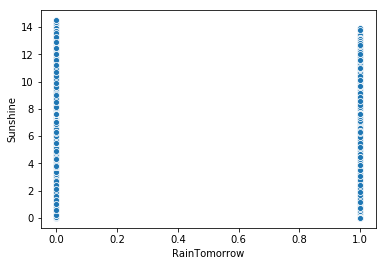

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
sb.scatterplot(x=data['RainTomorrow'],y=data['Sunshine'])

In [59]:
data[['Average Humidity','Average Temperature','Average Cloud','Evaporation','RainTomorrow']].corr()

,Average Humidity,Average Temperature,Average Cloud,Evaporation,RainTomorrow
Average Humidity,1.000000,-0.371637,0.450810,-0.364441,0.384495
Average Temperature,-0.371637,1.000000,-0.120212,0.429811,-0.046488
Average Cloud,0.450810,-0.120212,1.000000,-0.172383,0.311933
Evaporation,-0.364441,0.429811,-0.172383,1.000000,-0.090289
RainTomorrow,0.384495,-0.046488,0.311933,-0.090289,1.000000


# 9.Create a new column as rainfall levels with values as no, low, medium,high and heavy as categories and do the bivariate analysis between the rainfall level and the wind direction

In [60]:
q0=data['Rainfall'].quantile(0)
q0

0.0

In [61]:
q65=data['Rainfall'].quantile(0.65)
q85=data['Rainfall'].quantile(0.85)
q86=data['Rainfall'].quantile(0.86)
q96=data['Rainfall'].quantile(0.96)
q97=data['Rainfall'].quantile(0.97)
q99=data['Rainfall'].quantile(0.99)
print(q65)
print(q85)
print(q86)
print(q96)
print(q97)
print(q99)

0.2
3.0
3.6
15.599999999999998
19.4
37.8


In [62]:
norain=data[data['Rainfall']<q65]
norain['Rainfall Levels']='No Rain'

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
lowrain=data[data['Rainfall'].between(q65,q85)]
lowrain['Rainfall Levels']='Low Rain'
medrain=data[data['Rainfall'].between(q86,q96)]
medrain['Rainfall Levels']='Medium Rain'
highrain=data[data['Rainfall'].between(q97,q99)]
highrain['Rainfall Levels']='High Rain'
heavyrain=data[data['Rainfall']>q99]
heavyrain['Rainfall Levels']='Heavy Rain'

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [64]:
newdata=pd.concat([norain,lowrain,medrain,highrain,heavyrain])
newdata['Rainfall Levels'].unique()

array(['No Rain', 'Low Rain', 'Medium Rain', 'High Rain', 'Heavy Rain'],
      dtype=object)

In [65]:
table=pd.crosstab(index=newdata['WindGustDir'],columns=newdata['Rainfall Levels'])
table

Rainfall Levels,Heavy Rain,High Rain,Low Rain,Medium Rain,No Rain
WindGustDir,,,,,
E,69,107,949,415,4728
ENE,62,76,845,366,4233
ESE,71,109,918,371,3588
N,30,59,1237,411,4359
NE,44,69,760,265,3742
NNE,30,41,752,280,3313
NNW,30,51,978,413,3044
NW,51,114,1226,570,3570
S,92,169,1432,734,3571


In [66]:
from scipy.stats import chi2_contingency
chi2_contingency(table)
# As the p value is less than 0.05 (at 5% level of significance), so it means that wind gust direction and the rainfall are 
# related to each other.

(2518.0047521280917,
 0.0,
 60,
 array([[  63.47219376,  125.07958966, 1325.87127698,  631.8211409 ,
         4121.75579871],
        [  56.52549227,  111.39027911, 1180.7615616 ,  562.67160314,
         3670.65106388],
        [  51.20913909,  100.91376594, 1069.70820799,  509.75103853,
         3325.41784845],
        [  61.73045519,  121.64728439, 1289.48808304,  614.48335592,
         4008.65082146],
        [  49.41676859,   97.38168435, 1032.26736306,  491.90924818,
         3209.02493581],
        [  44.71812502,   88.12244223,  934.11735149,  445.13754917,
         2903.90453208],
        [  45.73076372,   90.11796855,  955.27037123,  455.21765672,
         2969.66323978],
        [  56.00904653,  110.37256069, 1169.97352154,  557.53074829,
         3637.11412295],
        [  60.73806926,  119.69166859, 1268.7581237 ,  604.60485053,
         3944.20728791],
        [  64.17091446,  126.45650282, 1340.4668606 ,  638.7764151 ,
         4167.12930702],
        [  62.07475235,  122

In [67]:
data.shape

(100000, 28)

# 10. Plot the correlation heatmap between the numerical variables

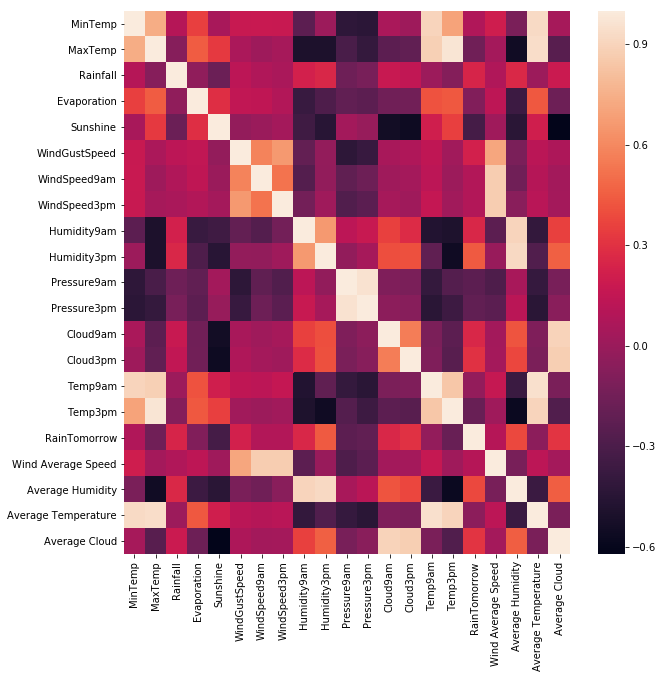

In [68]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,10))
data_num=data._get_numeric_data()
sb.heatmap(data_num.corr())